# Cantidad de datos utilizados en el entrenamiento y cantidad K de folds.

#### En este notebook analizamos cuál es la cantidad de datos necesarios para entrenar nuestros clasificadores y qué sucede cuando variamos el K de K-fold. Tomamos nuestros parámetros ideales obtenidos anteriormente para el algoritmo de KNN y KNN+PCA, y analizamos su performance en términos de accuracy y tiempo de ejecución.

## Compilando el módulo desde C++

#### Compilamos el modulo desde C++. En CMakeList.txt está seteado que se corra con OpenMP para paralelizar operaciones.

In [6]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: no se puede crear el directorio «build»: El archivo ya existe
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Found libomp without any special flags
-- pybind11 v2.6.3 dev1
-- Found PythonInterp: /home/laureano/Documentos/met2021/grupal/metnum-1c2021-tp2/tp2/bin/python (found vers

In [7]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version


/home/laureano/Documentos/met2021/grupal/metnum-1c2021-tp2/notebooks
Python 3.8.5


In [8]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
import pandas as pd
import time
import metnum
import funciones
import sklearn as sk
from tqdm import tqdm
from sklearn import metrics



In [9]:
setsDeDatos = []
cantidadDeDatosDeLosSets = []
cantidadDeDatos = 42000
for i in range(1,7):
    setsDeDatos.append(funciones.construir_dataset(numeroElementos = cantidadDeDatos // 2**i))
    cantidadDeDatosDeLosSets.append(cantidadDeDatos // 2**i)

#### Desordenamos los datos del set y creamos 6 sets de datos más chicos siguiendo una progresión geométrica. Utilizamos la funcion construir_dataset para darle formato correcto y separar los datos correctamente. Ahora, setsDeDatos contiene 6 tuplas de formato (X, y, X_test, y_test). Decidimos que X_test e y_test no varíen pese al número de elementos, sino que se testee siempre el clasificador contra un 20% de 42000.

## Búsqueda del par ideal de k vecinos y alpha componentes para KNN+PCA para diferentes tamaños del set.

In [5]:
for i in range(0,5):
    parIdeal = []
    tiemposDeEjecucion = [[] for i in range(6)]
    for setDeDatos in setsDeDatos:
        X_trains,Y_trains,X_vals,Y_vals = funciones.get_KFold_sets(setDeDatos[0],setDeDatos[1])
        tupla, tiempo = funciones.encontrarParOptimo(X_trains,Y_trains,X_vals,Y_vals)
        parIdeal.append((tupla[0],tupla[1]))
        tiemposDeEjecucion[i].append(tiempo)

  0%|          | 0/15 [00:45<?, ?it/s]


KeyboardInterrupt: 

In [73]:
tiemposDeEjecucion = [[1620.3209363490007, 517.9380939339926, 177.6935183219839, 89.05138266004178, 67.30538997799522,65.26426614898992], [1645.4255232589903, 521.5876698380043, 179.40793328798554,91.91850996098219,67.42663054798868,60.930074498992326], [1633.7907866350324,517.2767119390228,177.42631799903393,92.38252230397484,64.10420476996296,61.08341693202965],[1637.3618278339382,517.8258732898976,180.15826841188027,91.3361352909269,61.513064184029645,59.374192010160186],[1637.6247921559043,517.3657459989263,179.60324345999106,92.11012257916445,66.1535997420433,62.19547860386956],[1630.6813027420721,521.036983095968,179.4455943120047,95.63549344400963,67.14909283201996,59.16061952809105]]
parIdeal = [(5, 35),(3, 31),(5, 29),(5, 29),(4, 26),(1, 26)]

In [74]:
TiemposDeEjecucionPorSet = []

for k in range(0,6):
    suma = 0
    for i in range(0, len(tiemposDeEjecucion)):
        suma+= tiemposDeEjecucion[i][k]
    promedio = suma / 6
    TiemposDeEjecucionPorSet.append(promedio)
        
print(TiemposDeEjecucionPorSet)
    

[1634.2008614958231, 518.8385130159686, 178.95581263214657, 92.07236103984997, 65.6086636756733, 61.33467462035545]


In [75]:
#### Corrimos 5 veces el experimento para obtener un valor de tiempo mas representativo.

In [76]:
accuracys = []
for i in range(len(setsDeDatos)):
    y_pred = funciones.Test(parIdeal[i], setsDeDatos[i][0], setsDeDatos[i][1], setsDeDatos[i][2])
    acc = sk.metrics.accuracy_score(setsDeDatos[i][3], y_pred)
    accuracys.append(acc)
    
    

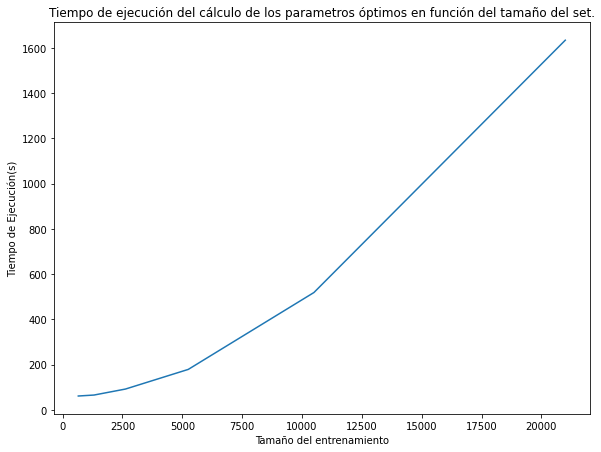

In [77]:
#Tiempo en funcion de tamaño
plt.figure(figsize = (6.4 * 1.5, 4.8 * 1.5))
plt.title("Tiempo de ejecución del cálculo de los parametros óptimos en función del tamaño del set.")
plt.xlabel("Tamaño del entrenamiento")
plt.ylabel("Tiempo de Ejecución(s)")
plt.plot(cantidadDeDatosDeLosSets,TiemposDeEjecucionPorSet)
plt.savefig('./graficosTamanoSet/tiempovstamanio.png')

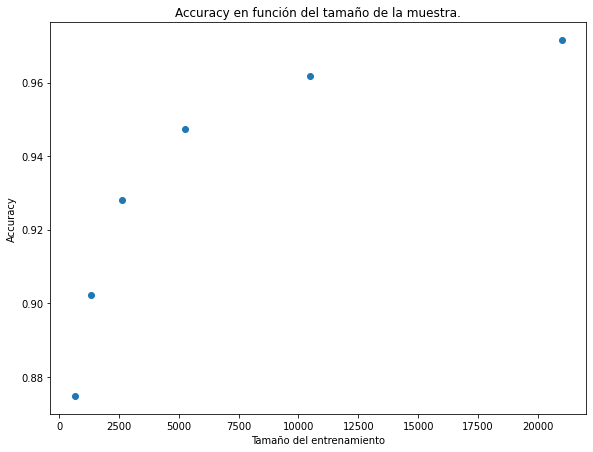

In [79]:
#Grafico de accu en funcion de tiempo.
plt.figure(figsize = (6.4 * 1.5, 4.8 * 1.5))
plt.title("Accuracy en función del tamaño de la muestra.")
plt.xlabel("Tamaño del entrenamiento")
plt.ylabel("Accuracy")
plt.scatter(cantidadDeDatosDeLosSets,accuracys)
plt.savefig('./graficosTamanoSet/accuvstamanio.png')


In [15]:
print(cantidadDeDatosDeLosSets)

[21000, 10500, 5250, 2625, 1312, 656]


## Variamos K de K-Fold.

#### Para cada K entrenamos 15 veces, shuffleando distinto la base de datos. Como la base de datos en si es la misma, deberia dar igual siempre. La idea es que para k chiquito, como no valida tantas veces, es propenso a errores y entonces es más inestable. Le medimos la varianza a los parametros mismos para intentar detectar esto. 

In [66]:

paresVars = []
tamanoIdeal = 5250
seeds = [1823,1273,98123,1273,12,7632,8763,65798,40738,213,1,2,3,4,5]
paresIdealesPorK = []
    
for K in [2,5]:
    paresIdeales = np.zeros((2,15))
    for i in range(15):
        X,Y,X_test,Y_test = funciones.construir_dataset(tamanoIdeal, seeds[i])
        X_trains,Y_trains,X_vals,Y_vals = funciones.get_KFold_sets(X,Y,K)
        tupla, tiempo = funciones.encontrarParOptimo(X_trains,Y_trains,X_vals,Y_vals)
        paresIdeales[0][i], paresIdeales[1][i] = tupla[0], tupla[1] 
        paresIdealesPorK.append(tupla)
        y_pred = funciones.Test(tupla,X,Y,X_test)
    
    varMatrix = np.cov(paresIdeales)
    paresVars.append(np.linalg.det(varMatrix))
   
 


#Shufflear varias veces. Medir la varianza de los parametros k y alpha. Medir la esperanza y la varianza del accuracy al testear.


100%|██████████| 15/15 [13:18<00:00, 53.22s/it]


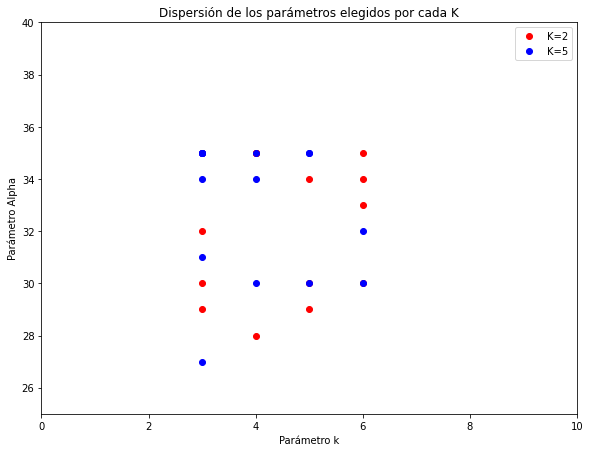

In [68]:
#grafico r2 de los parametros. (Y el numero de la varianza en las leyendas?)
Ks,As = zip(*paresIdealesPorK)

plt.figure(figsize = (6.4 * 1.5, 4.8 * 1.5))
plt.title("Dispersión de los parámetros elegidos por cada K")
plt.xlabel("Parámetro k")
plt.ylabel("Parámetro Alpha")
plt.xlim([0, 10])
plt.ylim([25, 40])
plt.plot(Ks[0:15],As[0:15],'or', label='K=2')
plt.plot(Ks[15:30],As[15:30],'ob', label='K=5')
plt.legend()
plt.savefig('./graficosTamanoSet/dispersionparams.png')

In [69]:
print("La varianza con K = 2 es ",paresVars[0])
print("La varianza con K = 5 es ",paresVars[1])

La varianza con K = 2 es  9.82619047619047
La varianza con K = 5 es  8.648979591836735
